### This script contains the following sections:

#### 1. Importing libraries and data 
#### 2. Wrangling and Visualizations


# 1. Imports

In [1]:
import pandas as pd 
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 

import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 
%matplotlib inline

In [2]:
path = r'C:\Users\\data_emergency_ex6.1'
data_path = r'C:\Users\\data_emergency_ex6.1\Data'

In [21]:
df = pd.read_csv(os.path.join(data_path,'Prepared','5.facilities_clusters.csv'))
df.head()

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit,cluster
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0,3
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0,0
2,2012,106010776,1,Alameda,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,747 52ND STREET,OAKLAND,94609,General Acute Care,0.0,...,19.0,1785.0,5949.0,0.0,1425.0,27285.0,10508.0,6911.0,39218.0,3
3,2012,106010805,1,Alameda,EDEN MEDICAL CENTER,20103 LAKE CHABOT ROAD,CASTRO VALLEY,94546,General Acute Care,0.0,...,6426.0,814.0,9169.0,0.0,666.0,29433.0,1632.0,6324.0,31731.0,0
4,2012,106010846,1,Alameda,HIGHLAND HOSPITAL,1411 EAST 31ST STREET,OAKLAND,94602,General Acute Care,1.0,...,4437.0,35836.0,1640.0,0.0,4025.0,57871.0,12306.0,8992.0,74202.0,1


In [4]:
df.shape

(2883, 52)

In [5]:
df.columns

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'er_service_level',
       'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19',
       'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69',
       'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit'],
      dtype='object')

In [6]:
# print(df.columns.get_loc('acute_care'),df.columns.get_loc('sn_ic_care'))

# 2. Data Wrangling

In [7]:
#double checking na values, in this case the values with NA are not required 
df.isna().sum()

year                      0
oshpd_id                  0
county_number             0
county_name               0
facility_name             0
dba_address1              0
dba_city                  0
dba_zip_code              0
license_category_desc     0
teaching_hospital_desc    0
licensed_bed_size         0
er_service_level          0
sex_male                  0
sex_female                0
sex_unk                   0
age_01_09                 0
age_10_19                 0
age_20_29                 0
age_30_39                 0
age_40_49                 0
age_50_59                 0
age_60_69                 0
age_70_79                 0
age_80_                   0
age_under_1               0
age_unknown               0
asian_pacific_island      0
black                     0
hispanic                  0
native_american_eski      0
other_race                0
unknown_race              0
white                     0
acute_care                0
against_medical_advice    0
died                

### Discharges/dispositions

In [8]:
# subset dataset with patient disposition encounters and year for further data wrangling

df_disp = df[['year','oshpd_id','acute_care','against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care']]

df_disp.head(2)

,year,oshpd_id,acute_care,against_medical_advice,died,hospice_care,home_health_service,residential_care,routine,psychiatric_care,sn_ic_care
0,2012,106010735,237.0,385.0,39.0,12.0,23.0,10.0,12462.0,210.0,201.0
1,2012,106010739,198.0,242.0,25.0,0.0,3.0,44.0,33653.0,934.0,156.0


In [9]:
# create encounter profiles/flags based on patient disposition.
# Medical Advice Discharges
# Discharge Against Medical Advice
# Died - outside the preferences of both patients and medical professionals (assumed)

#Medical Advice Discharges
df_disp['med_adv_flag'] = df[['acute_care','hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care']].sum(axis = 1)

df_disp

,year,oshpd_id,acute_care,against_medical_advice,died,hospice_care,home_health_service,residential_care,routine,psychiatric_care,sn_ic_care,med_adv_flag
0,2012,106010735,237.0,385.0,39.0,12.0,23.0,10.0,12462.0,210.0,201.0,13155.0
1,2012,106010739,198.0,242.0,25.0,0.0,3.0,44.0,33653.0,934.0,156.0,34988.0
2,2012,106010776,308.0,758.0,9.0,0.0,0.0,0.0,38135.0,0.0,0.0,38443.0
3,2012,106010805,1064.0,332.0,100.0,26.0,62.0,2.0,29049.0,695.0,50.0,30948.0
4,2012,106010846,1936.0,567.0,161.0,0.0,2.0,1.0,70104.0,0.0,143.0,72186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,2020,106560525,1004.0,639.0,21.0,10.0,37.0,1.0,22844.0,222.0,61.0,24179.0
2879,2020,106560529,347.0,1223.0,44.0,5.0,46.0,4.0,32367.0,806.0,60.0,33635.0
2880,2020,106571086,443.0,110.0,25.0,8.0,29.0,4.0,17866.0,53.0,57.0,18460.0
2881,2020,106574010,684.0,138.0,12.0,5.0,15.0,45.0,19550.0,454.0,142.0,20895.0


In [10]:
#drop unneeded disposition columns in the medcal advice flag
df_disp.drop(columns = ['acute_care','hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care'], axis = 1, inplace=True)

In [11]:
df_disp.head(3)

,year,oshpd_id,against_medical_advice,died,med_adv_flag
0,2012,106010735,385.0,39.0,13155.0
1,2012,106010739,242.0,25.0,34988.0
2,2012,106010776,758.0,9.0,38443.0


In [12]:
df_disp['total_disp'] = df_disp[['against_medical_advice', 'died' , 'med_adv_flag']].sum(axis = 1)
df_disp

,year,oshpd_id,against_medical_advice,died,med_adv_flag,total_disp
0,2012,106010735,385.0,39.0,13155.0,13579.0
1,2012,106010739,242.0,25.0,34988.0,35255.0
2,2012,106010776,758.0,9.0,38443.0,39210.0
3,2012,106010805,332.0,100.0,30948.0,31380.0
4,2012,106010846,567.0,161.0,72186.0,72914.0
...,...,...,...,...,...,...
2878,2020,106560525,639.0,21.0,24179.0,24839.0
2879,2020,106560529,1223.0,44.0,33635.0,34902.0
2880,2020,106571086,110.0,25.0,18460.0,18595.0
2881,2020,106574010,138.0,12.0,20895.0,21045.0


In [13]:
#summarize the data before calulating proportions for each disp profile

df_grouped = df_disp.groupby(['year'])[['against_medical_advice', 'died' , 'med_adv_flag','total_disp']].sum().reset_index()

prop_cols = ['against_medical_advice', 'died' , 'med_adv_flag']

for col in df_grouped.columns.tolist():
    if col in prop_cols:
            colname = col + '_prop'
            df_grouped[colname] = df_grouped[col] / df_grouped['total_disp']
            print(colname)
            
df_grouped.head()

against_medical_advice_prop
died_prop
med_adv_flag_prop


,year,against_medical_advice,died,med_adv_flag,total_disp,against_medical_advice_prop,died_prop,med_adv_flag_prop
0,2012,224657.0,16336.0,10235806.0,10476799.0,0.021443,0.001559,0.976997
1,2013,247230.0,16426.0,10532536.0,10796192.0,0.022900,0.001521,0.975579
2,2014,285659.0,15935.0,11144916.0,11446510.0,0.024956,0.001392,0.973652
3,2015,315322.0,16544.0,11893523.0,12225389.0,0.025792,0.001353,0.972854
4,2016,336901.0,16977.0,12154049.0,12507927.0,0.026935,0.001357,0.971708


**Comment**

Since the data is from 2012, after a major economic crisis, the starting range seems appropriate. However, an unusual number of emergency visits was recorded in 2020, the time range will be changed to 2019 for time series analysis.

In [14]:
df_pivoted = df_grouped.melt(id_vars = ['year'] , value_vars = ['against_medical_advice_prop',
                                                                           'died_prop' , 'med_adv_flag_prop'], 
                          var_name='disp_profile', value_name='disp_count'
                         ).sort_values(by=['year']).reset_index(drop=True)

df_pivoted.head()

,year,disp_profile,disp_count
0,2012,against_medical_advice_prop,0.021443
1,2012,med_adv_flag_prop,0.976997
2,2012,died_prop,0.001559
3,2013,against_medical_advice_prop,0.022900
4,2013,med_adv_flag_prop,0.975579


In [15]:
df_pivoted2 = df_grouped.melt(id_vars = ['year'] , value_vars = ['against_medical_advice',
                                                                           'died' , 'med_adv_flag'], 
                          var_name='disp_profile', value_name='disp_count'
                         ).sort_values(by=['year']).reset_index(drop=True)

df_pivoted2.head()

,year,disp_profile,disp_count
0,2012,against_medical_advice,224657.0
1,2012,med_adv_flag,10235806.0
2,2012,died,16336.0
3,2013,against_medical_advice,247230.0
4,2013,med_adv_flag,10532536.0


In [16]:
# plt.figure(figsize = (10,8), dpi = 100)

# g = sns.FacetGrid(df_pivoted2, col = 'disp_profile', margin_titles=True);
# g.map(sns.lineplot,'year','disp_count');

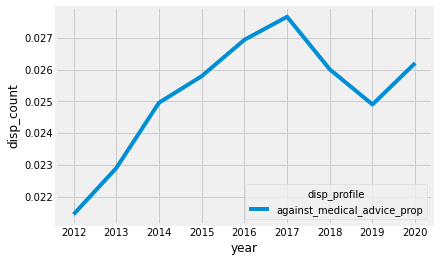

In [17]:
# plt.figure(figsize = (10,8), dpi = 100)
sns.lineplot(x = 'year', y = 'disp_count', hue = 'disp_profile',
             data = df_pivoted[df_pivoted['disp_profile'].isin(['against_medical_advice_prop'])]);

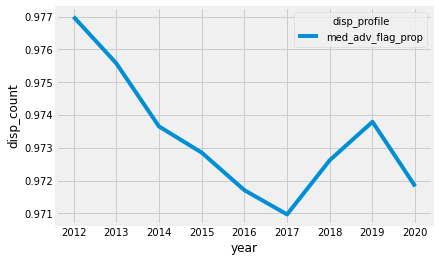

In [18]:
# plt.figure(figsize = (10,8), dpi = 100)
sns.lineplot(x = 'year', y = 'disp_count', hue = 'disp_profile',
             data = df_pivoted[df_pivoted['disp_profile'].isin(['med_adv_flag_prop'])]);

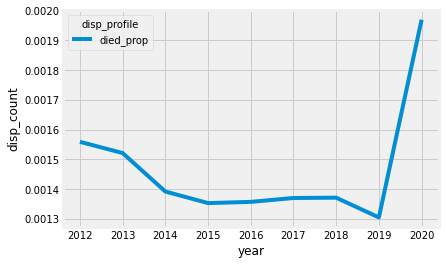

In [19]:
# plt.figure(figsize = (10,8), dpi = 100)
sns.lineplot(x = 'year', y = 'disp_count', hue = 'disp_profile',
             data = df_pivoted[df_pivoted['disp_profile'].isin(['died_prop'])]);

### Race groups

In [22]:
df.columns

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'er_service_level',
       'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19',
       'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69',
       'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit', 'cluster'],
      dtype='object')

In [39]:
df_race = df[['year','county_name', 'oshpd_id', 'asian_pacific_island', 'black', 'hispanic', 'native_american_eski','other_race', 'unknown_race', 'white','cluster']]

In [40]:
df_race = df_race.melt(id_vars = ['year','oshpd_id','county_name','cluster'],
                       value_vars = ['asian_pacific_island', 'black', 'hispanic', 'native_american_eski','other_race', 'unknown_race', 'white'],
                      var_name = 'race_group', value_name = 'race_count'). sort_values(by = ['year']).reset_index(drop = True)

df_race

,year,oshpd_id,county_name,cluster,race_group,race_count
0,2012,106010735,Alameda,3,asian_pacific_island,1335.0
1,2012,106190754,Los Angeles,0,white,2583.0
2,2012,106190708,Los Angeles,3,white,9397.0
3,2012,106190696,Los Angeles,3,white,1295.0
4,2012,106190687,Los Angeles,3,white,17990.0
...,...,...,...,...,...,...
20176,2020,106341051,Sacramento,1,asian_pacific_island,4761.0
20177,2020,106341006,Sacramento,0,asian_pacific_island,2908.0
20178,2020,106340951,Sacramento,0,asian_pacific_island,5614.0
20179,2020,106340947,Sacramento,3,asian_pacific_island,2096.0


In [43]:
df_race.isna().sum()

year           0
oshpd_id       0
county_name    0
cluster        0
race_group     0
race_count     0
dtype: int64

In [44]:
df_race.to_csv(os.path.join(data_path,'Prepared', '6.race_by_year.csv'), index = 0)